In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [2]:
heartdata = pd.read_csv('selected_heartdata.csv')
heartdata.head()

,HeartDisease,GenHealth,Stroke,DiffWalking,AgeCategory,PhysicalHealth
0,0,3,0,0,5,3.0
1,0,3,1,0,0,0.0
2,0,2,0,0,1,0.0
3,0,1,0,0,0,0.0
4,0,2,0,1,3,0.0


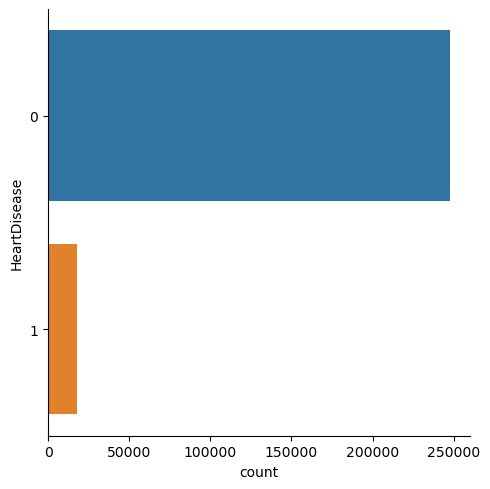

In [3]:
sb.catplot(y = "HeartDisease", data = heartdata, kind = "count")

In [4]:
y = heartdata["HeartDisease"]
X = heartdata[["GenHealth","DiffWalking","Stroke","PhysicalHealth","AgeCategory"]]

In [5]:
def logregClass(X_train, X_test, y_train, y_test):
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    cmTest = confusion_matrix(y_test, y_pred)
    tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
    fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

    print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
    print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
    print()

    print("FPR Train :\t", (fpTest/(tnTest + fpTest)))
    print("FNR Train :\t", (fnTest/(tpTest + fnTest)))

    sb.heatmap(confusion_matrix(y_test, y_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18})
    
    print(classification_report(y_test, y_pred))
    return y_pred

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Accuracy of logistic regression classifier on test set: 0.93
TPR Train :	 0.029859154929577466
TNR Train :	 0.9980050682051006

FPR Train :	 0.0019949317948994446
FNR Train :	 0.9701408450704225
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     74188
           1       0.52      0.03      0.06      5325

    accuracy                           0.93     79513
   macro avg       0.73      0.51      0.51     79513
weighted avg       0.91      0.93      0.90     79513



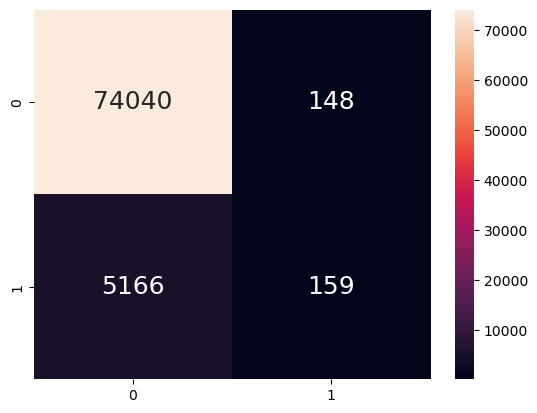

In [7]:
y_pred = logregClass(X_train, X_test, y_train, y_test)

The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
The recall is intuitively the ability of the classifier to find all the positive samples.
The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. 

This shows that the model is very bad at finding all the postiive samples and ingeneral terrible this is due to the data set being imbalance

In [8]:
balancedheartdata = pd.read_csv('balanced_heartdata.csv')

In [9]:
y_under = balancedheartdata["HeartDisease"]
X_under = balancedheartdata[["GenHealth","DiffWalking","Stroke","PhysicalHealth","AgeCategory"]]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

Accuracy of logistic regression classifier on test set: 0.74
TPR Train :	 0.7566634707574305
TNR Train :	 0.7195098963242225

FPR Train :	 0.2804901036757776
FNR Train :	 0.24333652924256952
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      5305
           1       0.73      0.76      0.74      5215

    accuracy                           0.74     10520
   macro avg       0.74      0.74      0.74     10520
weighted avg       0.74      0.74      0.74     10520



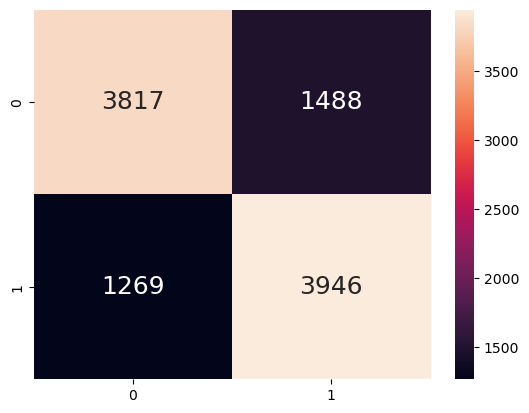

In [11]:
y_pred_under = logregClass(X_train, X_test, y_train, y_test)